# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [42]:
from scipy.stats import uniform

loc = 2          # starting point
scale = 4         # length of the interval 

# Generate random samples
samples = uniform.rvs(loc=loc, scale=scale, size=10000)

In [43]:
print(samples)


[3.10289634 3.26884115 5.16854828 ... 3.76083379 3.80798458 5.87690337]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [44]:
def generate_uniform(bottom, ceiling, count):
    """
    Generates uniformly distributed random numbers.
    """
    loc = bottom
    scale = ceiling - bottom
    return uniform.rvs(loc=loc, scale=scale, size=count)


In [45]:
samples_1 = generate_uniform(bottom=10, ceiling=15, count=100)
samples_2 = generate_uniform(bottom=10, ceiling=60, count=1000)


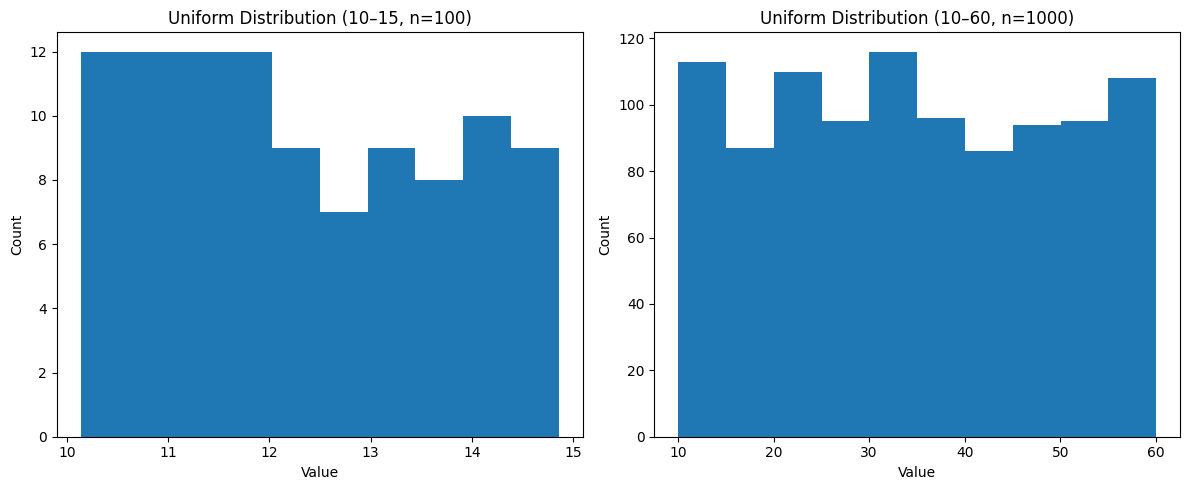

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_1, bins=10)
plt.title("Uniform Distribution (10–15, n=100)")
plt.xlabel("Value")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(samples_2, bins=10)
plt.title("Uniform Distribution (10–60, n=1000)")
plt.xlabel("Value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


How are the two distributions different?

In [47]:
'''Range: second is much wider.
Smoothness: second is smoother because it has more samples.
Appearance: first may look bumpy; second looks like a flat line across bins.'''

'Range: second is much wider.\nSmoothness: second is smoother because it has more samples.\nAppearance: first may look bumpy; second looks like a flat line across bins.'

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [48]:
from scipy.stats import norm 

In [49]:
def generate_normal(mean, std_dev, count):
    """
    Generates normally distributed random numbers.
    
    Parameters:
    mean (float): mean (average) of the distribution
    std_dev (float): standard deviation of the distribution
    count (int): number of values to generate
    
    Returns:
    array: normally distributed random numbers
    """
    return norm.rvs(loc=mean, scale=std_dev, size=count)


In [50]:
# 1,000 numbers with mean=10 and std=1
normal1 = generate_normal(mean=10, std_dev=1, count=1000)

# 1,000 numbers with mean=10 and std=50
normal2 = generate_normal(mean=10, std_dev=50, count=1000)


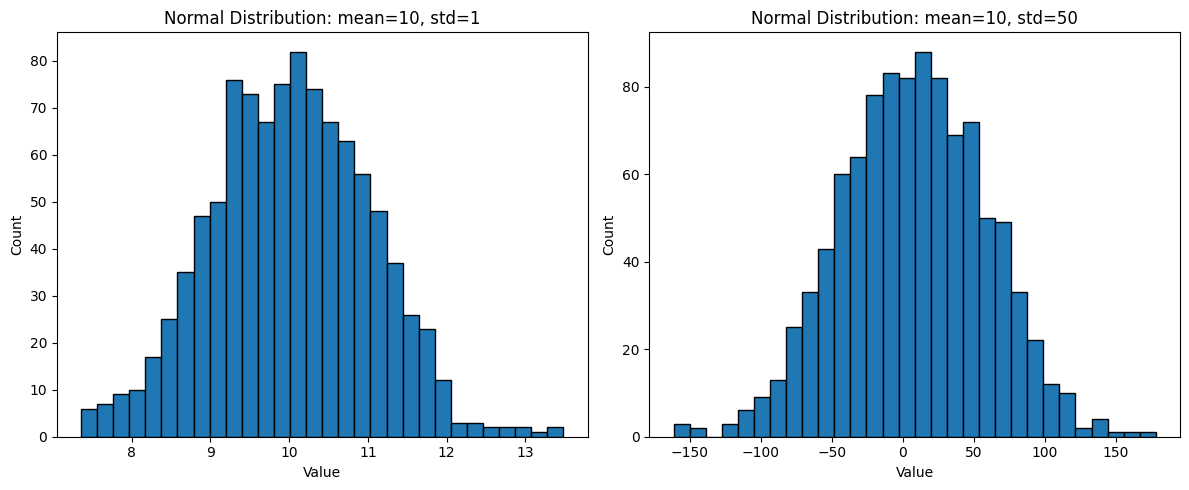

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# First normal distribution
plt.subplot(1, 2, 1)
plt.hist(normal1, bins=30, edgecolor='black')
plt.title('Normal Distribution: mean=10, std=1')
plt.xlabel('Value')
plt.ylabel('Count')

# Second normal distribution
plt.subplot(1, 2, 2)
plt.hist(normal2, bins=30, edgecolor='black')
plt.title('Normal Distribution: mean=10, std=50')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


How are the two distributions different?

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [52]:
# Load the dataset
vehicles = pd.read_csv('vehicles.csv')

# Quick look at the data
vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [53]:
fuel_data = vehicles['Fuel Barrels/Year']

# Quick stats
fuel_data.describe()

count    35952.000000
mean        17.609056
std          4.467283
min          0.060000
25%         14.699423
50%         17.347895
75%         20.600625
max         47.087143
Name: Fuel Barrels/Year, dtype: float64

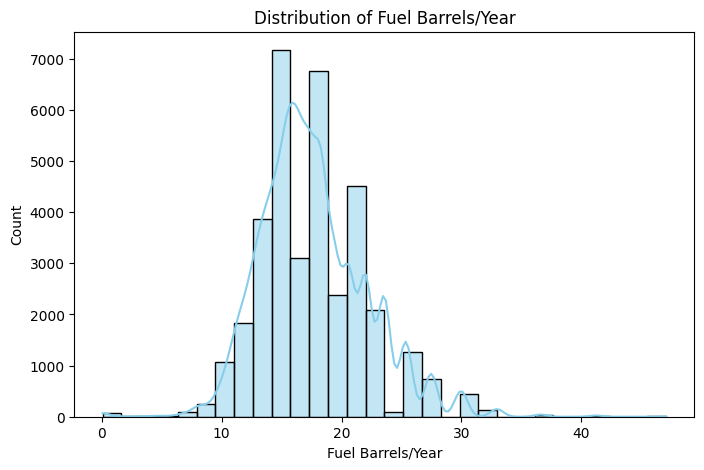

In [54]:
plt.figure(figsize=(8,5))

# Histogram
sns.histplot(fuel_data, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Fuel Barrels/Year')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('Count')
plt.show()

2. CO2 Emission Grams/Mile 

In [55]:
data = vehicles['CO2 Emission Grams/Mile']

# Quick stats
data.describe()

count    35952.000000
mean       475.316339
std        119.060773
min         37.000000
25%        395.000000
50%        467.736842
75%        555.437500
max       1269.571429
Name: CO2 Emission Grams/Mile, dtype: float64

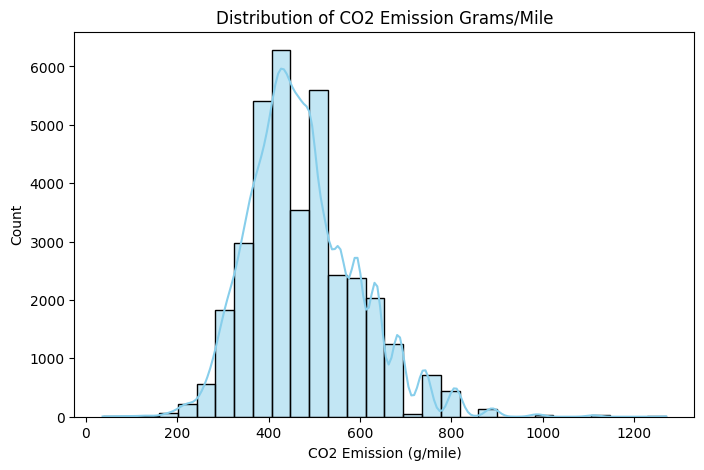

In [56]:
plt.figure(figsize=(8,5))

# Histogram
sns.histplot(data, bins=30, kde=True, color='skyblue')
plt.title('Distribution of CO2 Emission Grams/Mile')
plt.xlabel('CO2 Emission (g/mile)')
plt.ylabel('Count')
plt.show()

3. Combined MPG

In [57]:
data_mpg = vehicles['Combined MPG']

# Quick stats
data.describe()

count    35952.000000
mean       475.316339
std        119.060773
min         37.000000
25%        395.000000
50%        467.736842
75%        555.437500
max       1269.571429
Name: CO2 Emission Grams/Mile, dtype: float64

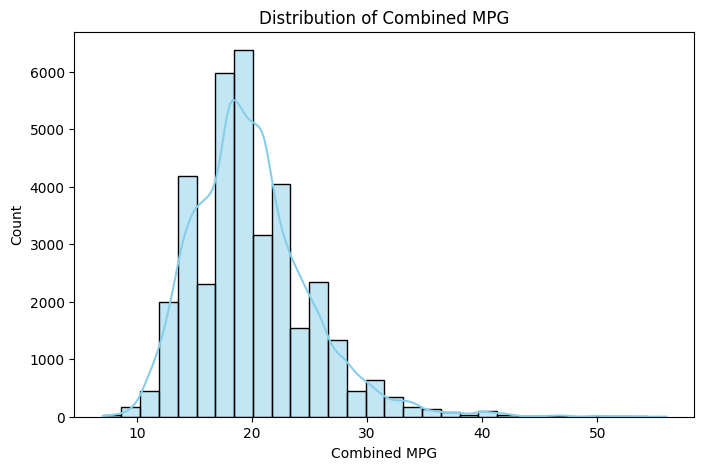

In [58]:
plt.figure(figsize=(8,5))

# Histogram
sns.histplot(data_mpg, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Combined MPG')
plt.xlabel('Combined MPG')
plt.ylabel('Count')
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [59]:
# Skewness and kurtosis
variables = ['Fuel Barrels/Year', 'CO2 Emission Grams/Mile', 'Combined MPG']

for col in variables:
    skew = vehicles[col].skew()
    kurt = vehicles[col].kurtosis()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")


Fuel Barrels/Year: Skewness = 0.64, Kurtosis = 1.47
CO2 Emission Grams/Mile: Skewness = 0.74, Kurtosis = 1.26
Combined MPG: Skewness = 1.07, Kurtosis = 2.72


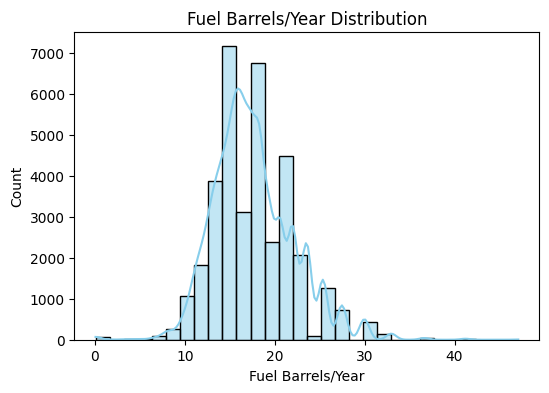

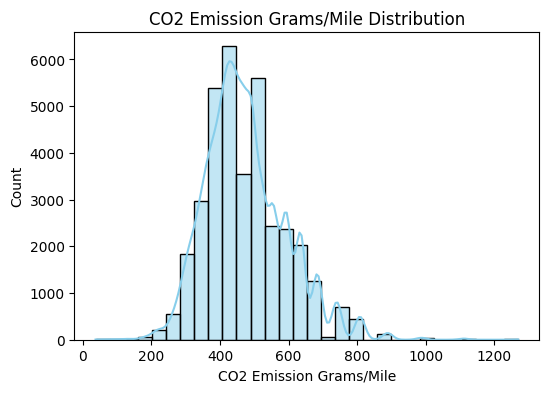

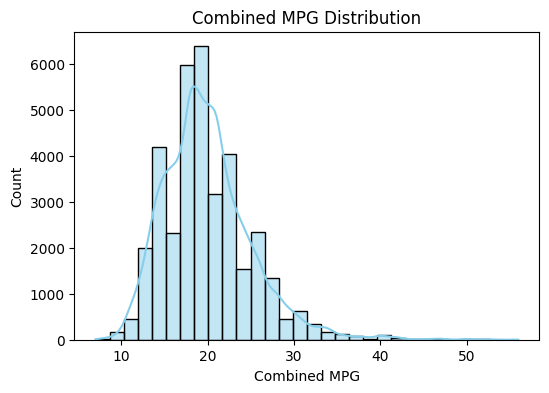

In [60]:
for col in variables:
    plt.figure(figsize=(6,4))
    sns.histplot(vehicles[col], bins=30, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.show()


In [61]:
'''Combined MPG has the highest right skew (1.07), so it is the most 
asymmetric, but its kurtosis (2.72) is closest to the normal value (3), 
meaning its peak and tails are most similar to a normal distribution. 
Overall, Combined MPG is the closest to normal, while fuel use and 
emissions are clearly skewed.'''

'Combined MPG has the highest right skew (1.07), so it is the most \nasymmetric, but its kurtosis (2.72) is closest to the normal value (3), \nmeaning its peak and tails are most similar to a normal distribution. \nOverall, Combined MPG is the closest to normal, while fuel use and \nemissions are clearly skewed.'

None of them are normally ditributed. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [62]:
def generate_exponential(mean, size):
    """
    Generates exponentially distributed random numbers.
    
    Parameters:
    mean (float): mean of the distribution
    size (int): number of values to generate
    
    Returns:
    array: exponentially distributed random numbers
    """
    return np.random.exponential(scale=mean, size=size)


In [68]:
# Generate datasets
exp_10 = generate_exponential(mean=10, size=10)
exp_100 = generate_exponential(mean=10, size=100)


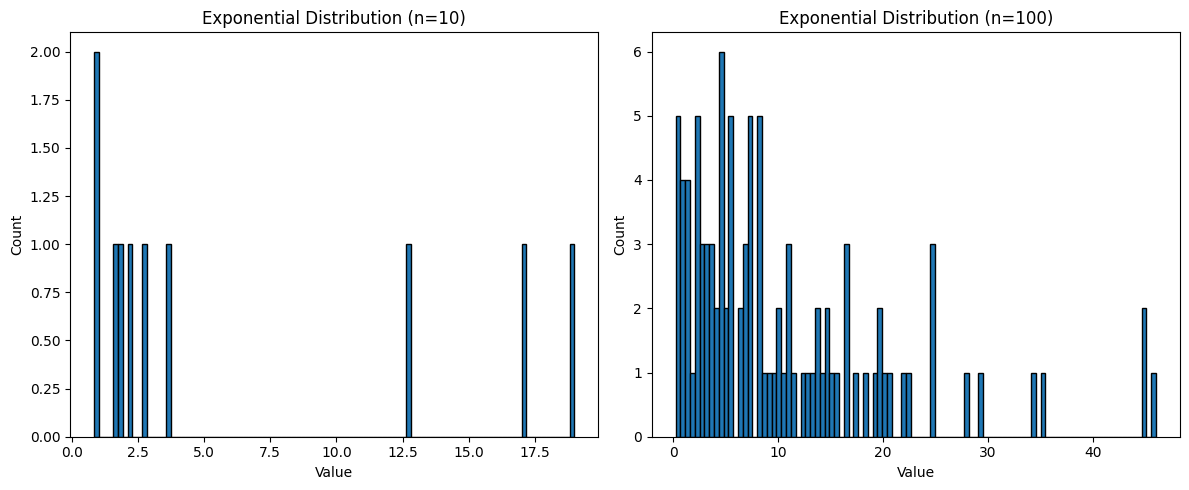

In [71]:
plt.figure(figsize=(12,5))

# Histogram for size = 10
plt.subplot(1, 2, 1)
plt.hist(exp_10, bins=100, edgecolor='black')
plt.title('Exponential Distribution (n=10)')
plt.xlabel('Value')
plt.ylabel('Count')

# Histogram for size = 100
plt.subplot(1, 2, 2)
plt.hist(exp_100, bins=100, edgecolor='black')
plt.title('Exponential Distribution (n=100)')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


How are the two distributions different?

In [73]:
'''Both distributions are right-skewed, Most values are close to 0,
As the sample size increases (100 vs 10), the exponential shape becomes 
much clearer. Small samples look noisy. Larger samples reveal the true shape.'''

'Both distributions are right-skewed, Most values are close to 0,\nAs the sample size increases (100 vs 10), the exponential shape becomes \nmuch clearer. Small samples look noisy. Larger samples reveal the true shape.'

The mean changes, so the distribution changes as well. 

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [76]:
from scipy.stats import expon

# Given parameters
mean = 10
lambda_ = 1 / mean

# Probability that time spent is less than 15 minutes
probability = expon.cdf(15, scale=mean)

In [78]:
print(probability)

0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [80]:
from scipy.stats import expon

mean = 10

probability = 1 - expon.cdf(15, scale=mean)

In [81]:
print(probability)

0.2231301601484298
